**Применение нейронных сетей для прогнозирования цен акций и криптовалют**

In [ ]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

import warnings

warnings.filterwarnings('ignore')

from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_percentage_error as mape

# Работа с данными

In [ ]:
df = pd.read_csv("/content/SBER.csv")
df['Цена'] = df['Цена'].str.replace('.', '').str.replace(',', '.').astype(float)
sber = df['Цена']
splitted = df['Дата'].str.split('.', expand=True)
df['день'] = splitted[0].astype('int')
df['месяц'] = splitted[1].astype('int')
df['год'] = splitted[2].astype('int')
df.head(3)

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,день,месяц,год
0,11.01.2024,275.71,"274,78","275,97","274,08","19,53M","0,44%",11,1,2024
1,10.01.2024,274.49,"275,30","276,16","273,64","20,66M","-0,29%",10,1,2024
2,09.01.2024,275.28,"276,97","278,00","274,71","20,32M","-0,53%",9,1,2024


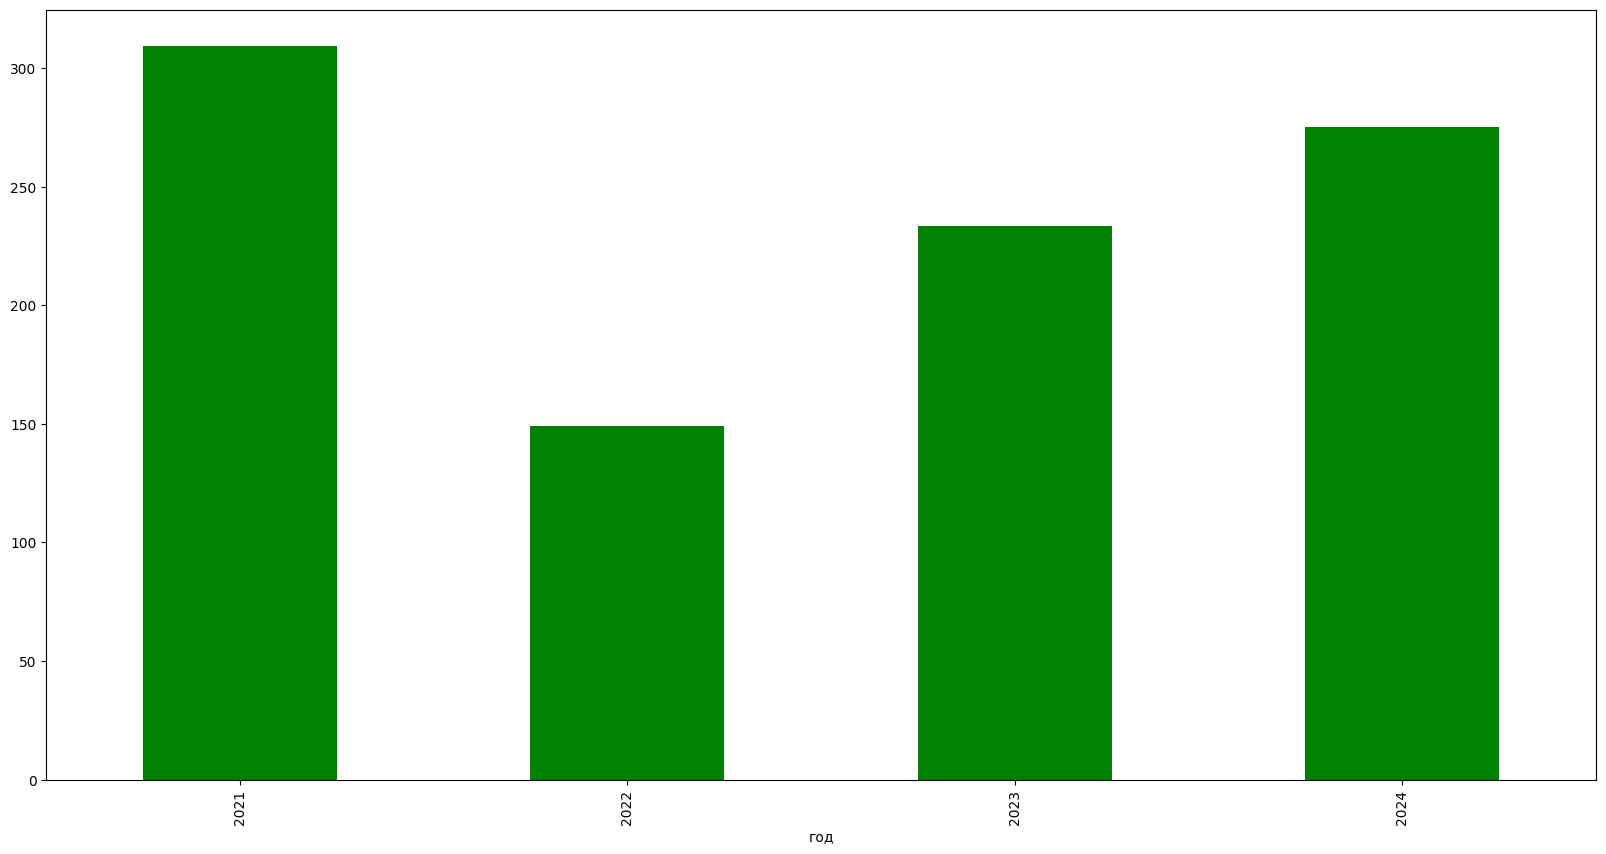

In [ ]:
data_grouped = df.groupby('год').mean()
plt.figure(figsize=(20,10))
data_grouped['Цена'].plot.bar(color='green')
plt.show()

In [ ]:
df = pd.read_csv("/content/ETH_USD Binance.csv")
df['Цена'] = df['Цена'].str.replace('.', '').str.replace(',', '.').astype(float)
eth = df['Цена']
splitted = df['Дата'].str.split('.', expand=True)
df['день'] = splitted[0].astype('int')
df['месяц'] = splitted[1].astype('int')
df['год'] = splitted[2].astype('int')
df.head(3)

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,день,месяц,год
0,30.12.2023,2291.68,"2.297,84","2.322,74","2.269,24","210,55K","-0,33%",30,12,2023
1,29.12.2023,2299.19,"2.344,21","2.385,23","2.265,65","450,20K","-1,93%",29,12,2023
2,28.12.2023,2344.38,"2.379,33","2.443,56","2.338,40","580,50K","-1,44%",28,12,2023


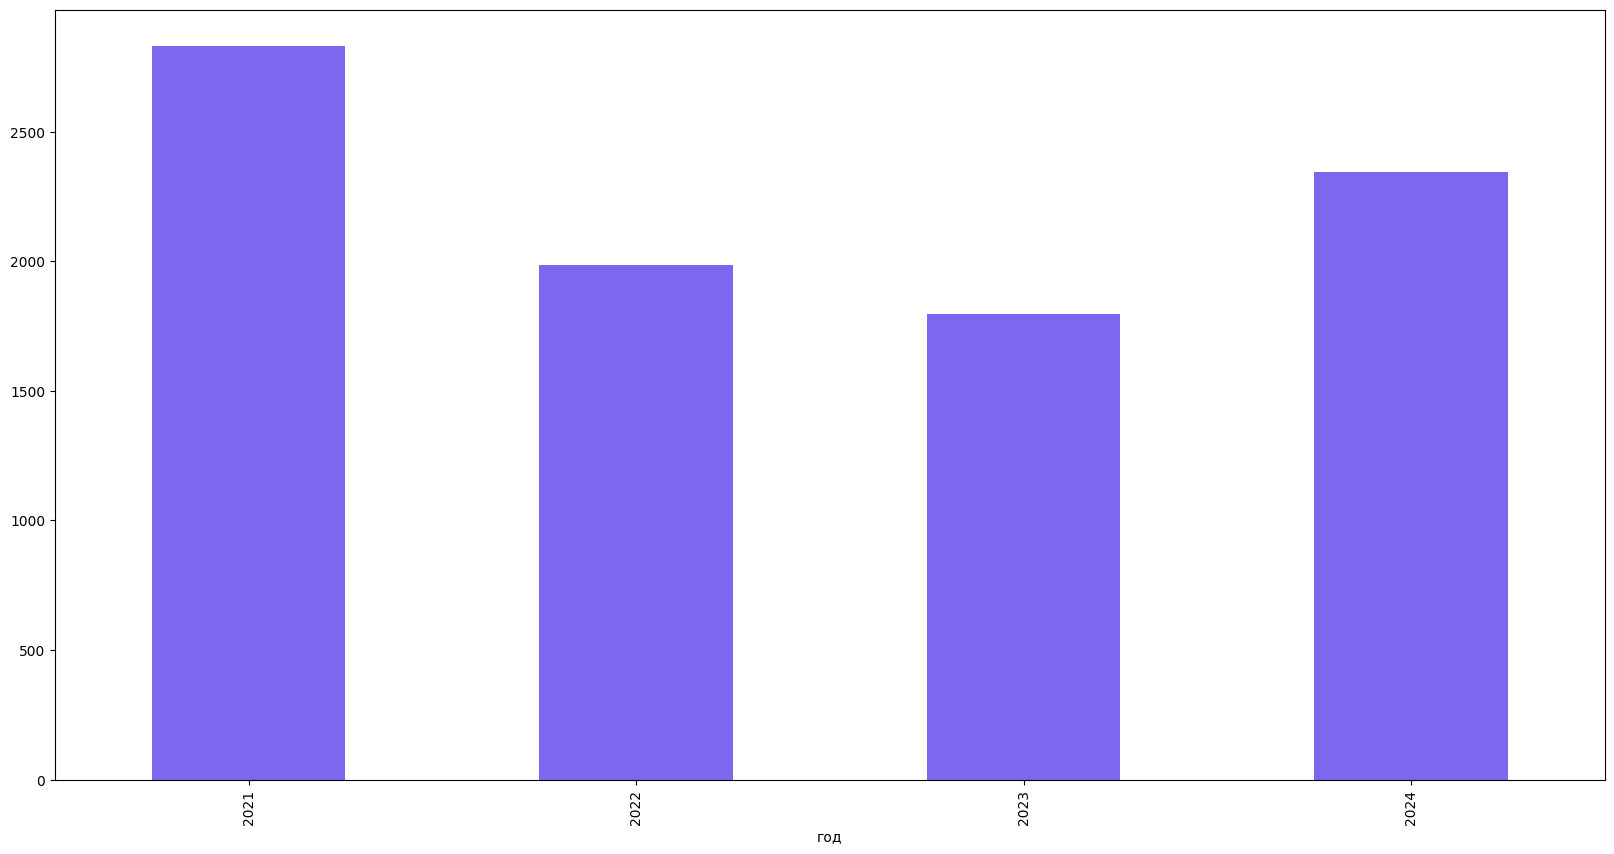

In [ ]:
data_grouped = df.groupby('год').mean()
plt.figure(figsize=(20,10))
data_grouped['Цена'].plot.bar(color='mediumslateblue')
plt.show()

In [ ]:
df = pd.read_csv("/content/Cardano.csv")
df['Цена'] = df['Цена'].str.replace('.', '').str.replace(',', '.').astype(float)
ada = df['Цена']
splitted = df['Дата'].str.split('.', expand=True)
df['день'] = splitted[0].astype('int')
df['месяц'] = splitted[1].astype('int')
df['год'] = splitted[2].astype('int')
df.head(3)

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,день,месяц,год
0,30.12.2023,0.6011,"0,6083","0,6130","0,5934","129,84M","-1,19%",30,12,2023
1,29.12.2023,0.6083,"0,6160","0,6256","0,5934","238,99M","-1,25%",29,12,2023
2,28.12.2023,0.6160,"0,6333","0,6760","0,6101","377,12M","-2,76%",28,12,2023


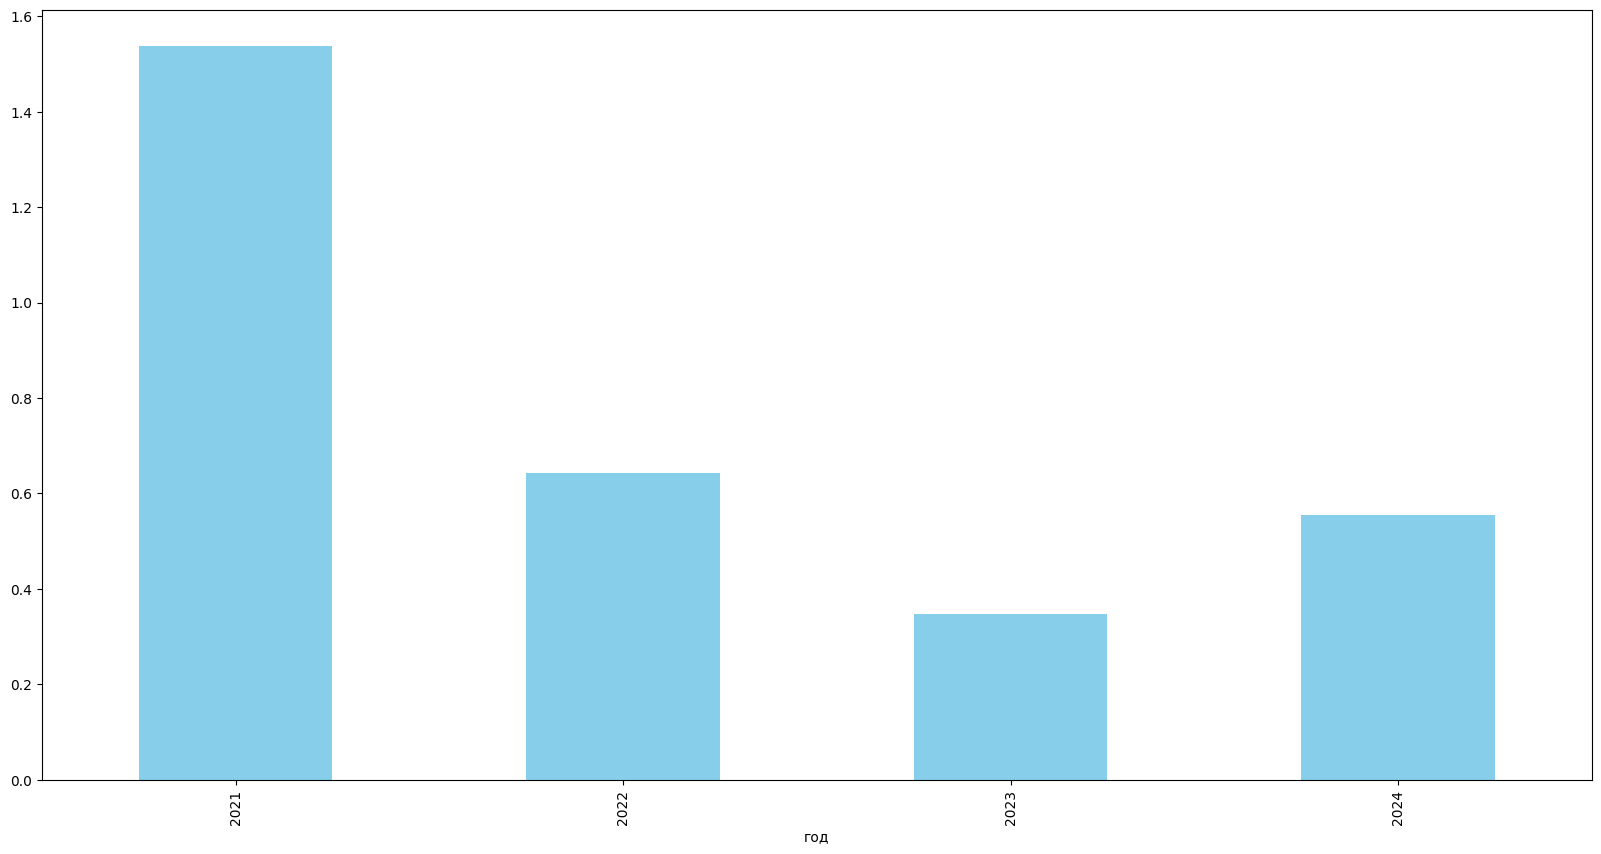

In [ ]:
data_grouped = df.groupby('год').mean()
plt.figure(figsize=(20,10))
data_grouped['Цена'].plot.bar(color='skyblue')
plt.show()

In [ ]:
df = pd.read_csv("Фьючерс на золото.csv")
df['Цена'] = df['Цена'].str.replace('.', '').str.replace(',', '.').astype(float)
data = df['Цена']
splitted = df['Дата'].str.split('.', expand=True)
df['день'] = splitted[0].astype('int')
df['месяц'] = splitted[1].astype('int')
df['год'] = splitted[2].astype('int')
t = np.arange(1, len(data)+1, 1)
df.head(5)

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,день,месяц,год
0,20.12.2023,2047.45,"2.054,05","2.056,75","2.044,85",NaN,"-0,23%",20,12,2023
1,19.12.2023,2052.10,"2.041,10","2.061,00","2.034,80","134,78K","0,57%",19,12,2023
2,18.12.2023,2040.50,"2.033,30","2.048,00","2.029,50","141,41K","0,24%",18,12,2023
3,15.12.2023,2035.70,"2.051,30","2.059,60","2.029,20","172,15K","-0,45%",15,12,2023
4,14.12.2023,2044.90,"2.043,20","2.062,90","2.039,10","231,10K","2,38%",14,12,2023


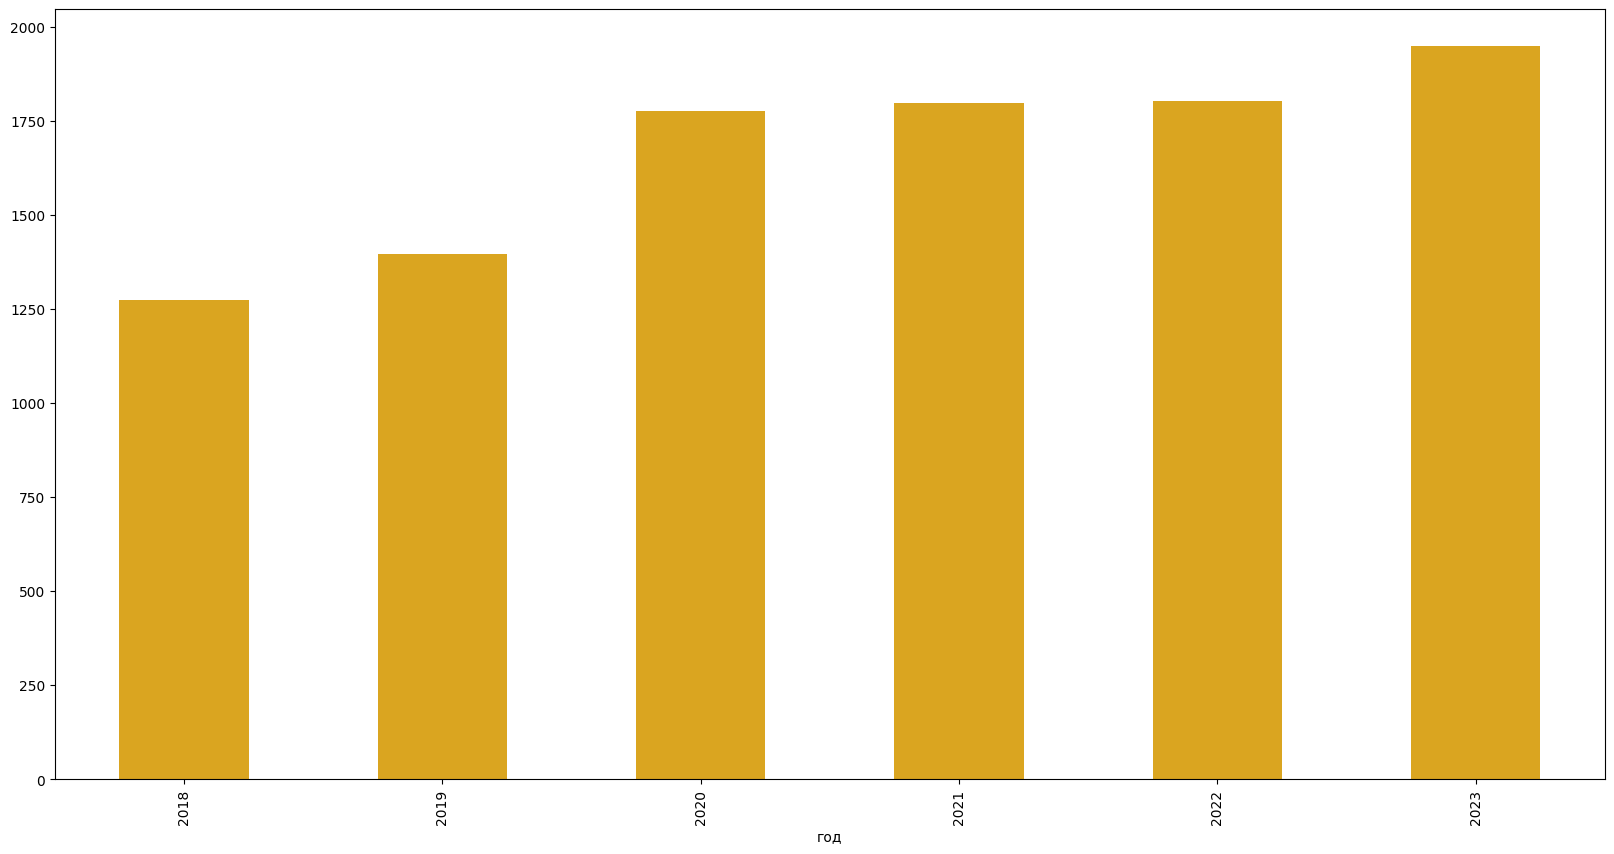

In [ ]:
data_grouped = df.groupby('год').mean()
plt.figure(figsize=(20,10))
data_grouped['Цена'].plot.bar(color='goldenrod')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 785 entries, 0 to 784
Series name: Цена
Non-Null Count  Dtype  
--------------  -----  
785 non-null    float64
dtypes: float64(1)
memory usage: 6.3 KB


In [ ]:
# ts = np.arange(1, len(sber)+1, 1)
te = np.arange(1, len(eth)+1, 1)
ta = np.arange(1, len(ada)+1, 1)

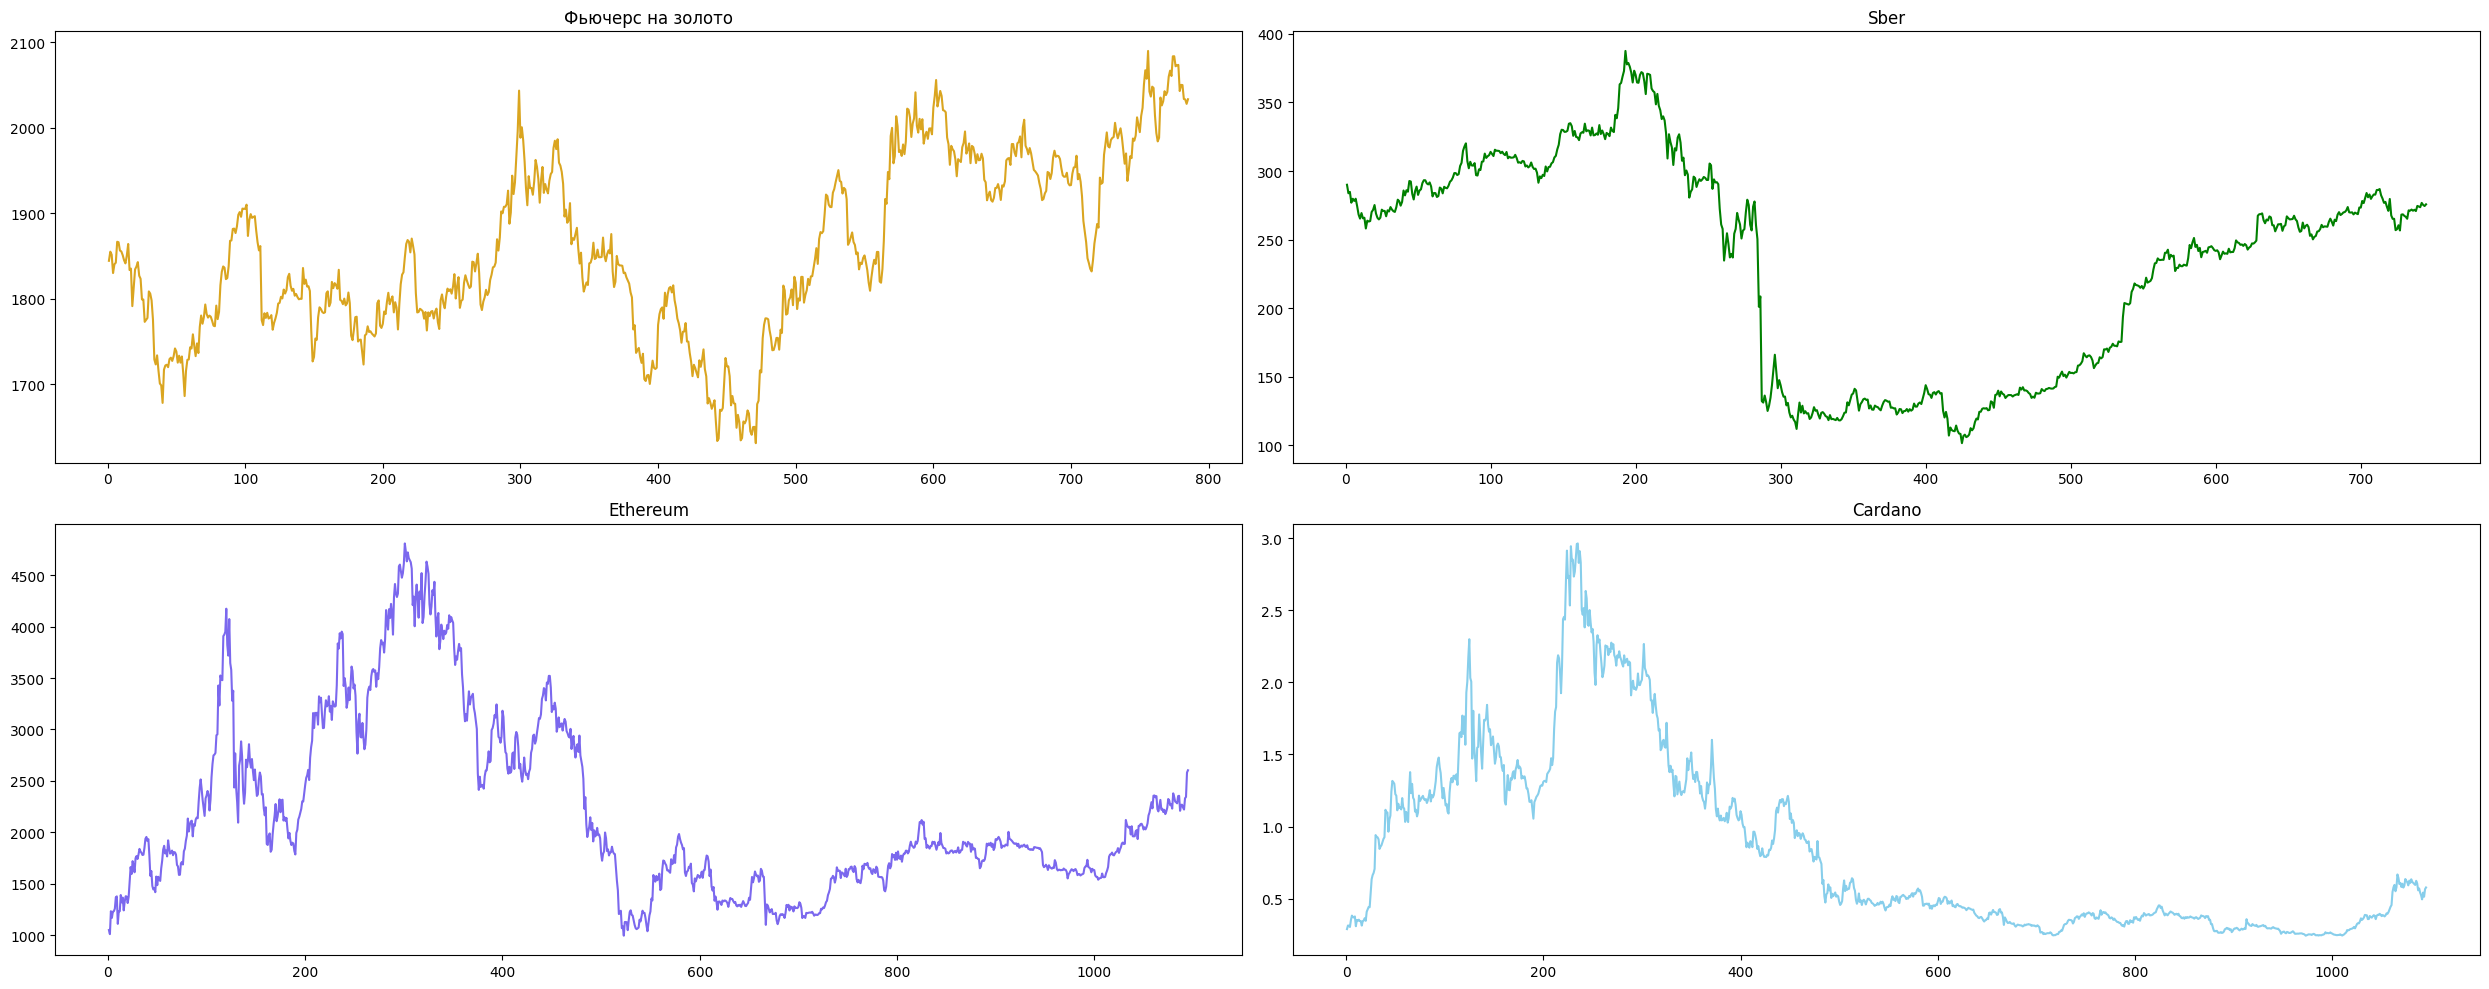

In [ ]:
plt.figure(figsize=(25, 10))

plt.subplot(2, 2, 1)
plt.plot(t, data[::-1], color='goldenrod')
plt.title('Фьючерс на золото')

plt.subplot(2, 2, 2)
plt.plot(ts, sber[::-1], color='green')
plt.title('Sber')

plt.subplot(2, 2, 3)
plt.plot(te, eth[::-1], color='mediumslateblue')
plt.title('Ethereum')

plt.subplot(2, 2, 4)
plt.plot(ta, ada[::-1], color='skyblue')
plt.title('Cardano')

plt.tight_layout()
plt.show()

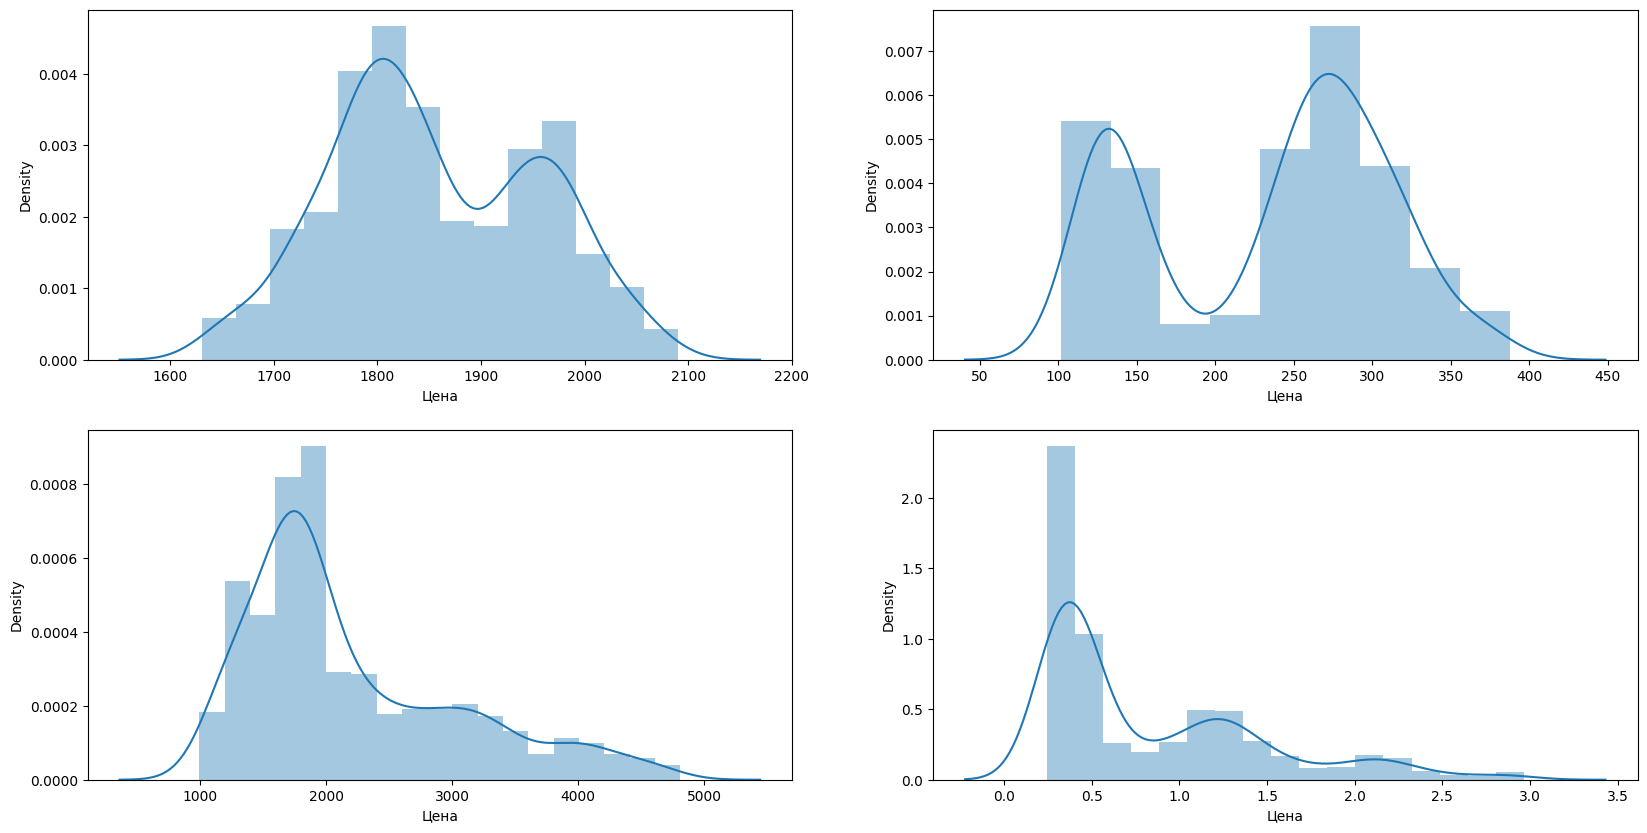

In [ ]:
features = [data, sber, eth, ada]
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
  plt.subplot(2, 2, i+1)
  sb.distplot(col)
plt.show()






---



# Фьючерс на золото

In [ ]:
df['Откр.'] = df['Откр.'].str.replace('.', '').str.replace(',', '.').astype(float)
df['Макс.'] = df['Макс.'].str.replace('.', '').str.replace(',', '.').astype(float)
df['Мин.'] = df['Мин.'].str.replace('.', '').str.replace(',', '.').astype(float)

In [ ]:
df.describe()

,Цена,Откр.,Макс.,Мин.,день,месяц,год
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,1743.491917,1743.746228,1755.894958,1730.871209,15.751347,6.531948,2020.983064
std,208.830402,209.166664,210.936064,206.978689,8.789557,3.439038,1.426588
min,1258.100000,1248.500000,1266.200000,1247.100000,1.000000,1.000000,2018.000000
25%,1643.150000,1639.600000,1660.050000,1626.800000,8.000000,4.000000,2020.000000
50%,1798.000000,1797.300000,1810.800000,1785.000000,16.000000,7.000000,2021.000000
75%,1900.950000,1901.750000,1913.250000,1885.550000,23.000000,9.500000,2022.000000
max,2089.700000,2094.400000,2152.300000,2055.900000,31.000000,12.000000,2023.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Дата    1299 non-null   object 
 1   Цена    1299 non-null   float64
 2   Откр.   1299 non-null   float64
 3   Макс.   1299 non-null   float64
 4   Мин.    1299 non-null   float64
 5   Объём   1283 non-null   object 
 6   Изм. %  1299 non-null   object 
 7   день    1299 non-null   int64  
 8   месяц   1299 non-null   int64  
 9   год     1299 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 101.6+ KB


In [ ]:
df.isnull().sum()

Дата      0
Цена      0
Откр.     0
Макс.     0
Мин.      0
Объём     0
Изм. %    0
день      0
месяц     0
год       0
dtype: int64

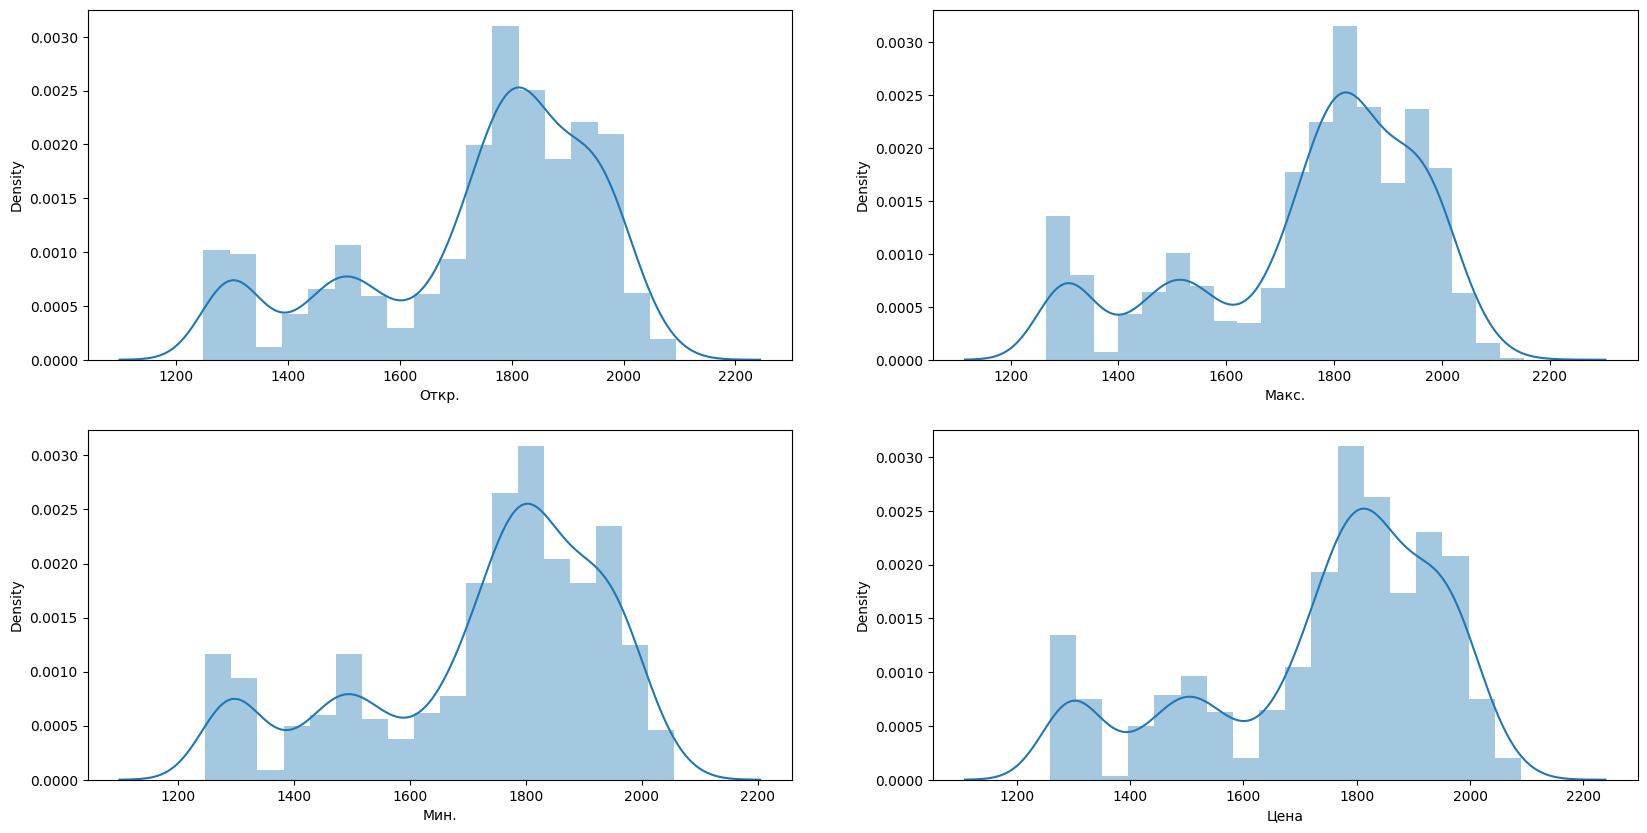

In [ ]:
features = ['Откр.', 'Макс.', 'Мин.', 'Цена']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()
# График распределения данных Открытие-Макс.-Мин.-Цена

In [ ]:
df['Объём'] = df['Объём'].str.replace(',', '.')
df['Объём'] = df['Объём'].str.slice(0, -1)
df['Изм. %'] = df['Изм. %'].str.replace(',', '.')
df['Изм. %'] = df['Изм. %'].str.slice(0, -1)

In [ ]:
df.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,день,месяц,год
0,20.12.2023,2047.45,2054.05,2056.75,2044.85,NaN,-0.23,20,12,2023
1,19.12.2023,2052.10,2041.10,2061.00,2034.80,134.78,0.57,19,12,2023
2,18.12.2023,2040.50,2033.30,2048.00,2029.50,141.41,0.24,18,12,2023
3,15.12.2023,2035.70,2051.30,2059.60,2029.20,172.15,-0.45,15,12,2023
4,14.12.2023,2044.90,2043.20,2062.90,2039.10,231.10,2.38,14,12,2023


In [ ]:
df['Объём'] = df['Объём'].astype(float)
df['Изм. %'] = df['Изм. %'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Дата    1299 non-null   object 
 1   Цена    1299 non-null   float64
 2   Откр.   1299 non-null   float64
 3   Макс.   1299 non-null   float64
 4   Мин.    1299 non-null   float64
 5   Объём   1283 non-null   float64
 6   Изм. %  1299 non-null   float64
 7   день    1299 non-null   int64  
 8   месяц   1299 non-null   int64  
 9   год     1299 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 101.6+ KB


In [ ]:
df['Объём'] = df.groupby(['год', 'месяц'])['Объём'].transform(lambda x: x.fillna(x.mean()))
df.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,день,месяц,год
0,20.12.2023,2047.45,2054.05,2056.75,2044.85,198.123077,-0.23,20,12,2023
1,19.12.2023,2052.10,2041.10,2061.00,2034.80,134.780000,0.57,19,12,2023
2,18.12.2023,2040.50,2033.30,2048.00,2029.50,141.410000,0.24,18,12,2023
3,15.12.2023,2035.70,2051.30,2059.60,2029.20,172.150000,-0.45,15,12,2023
4,14.12.2023,2044.90,2043.20,2062.90,2039.10,231.100000,2.38,14,12,2023


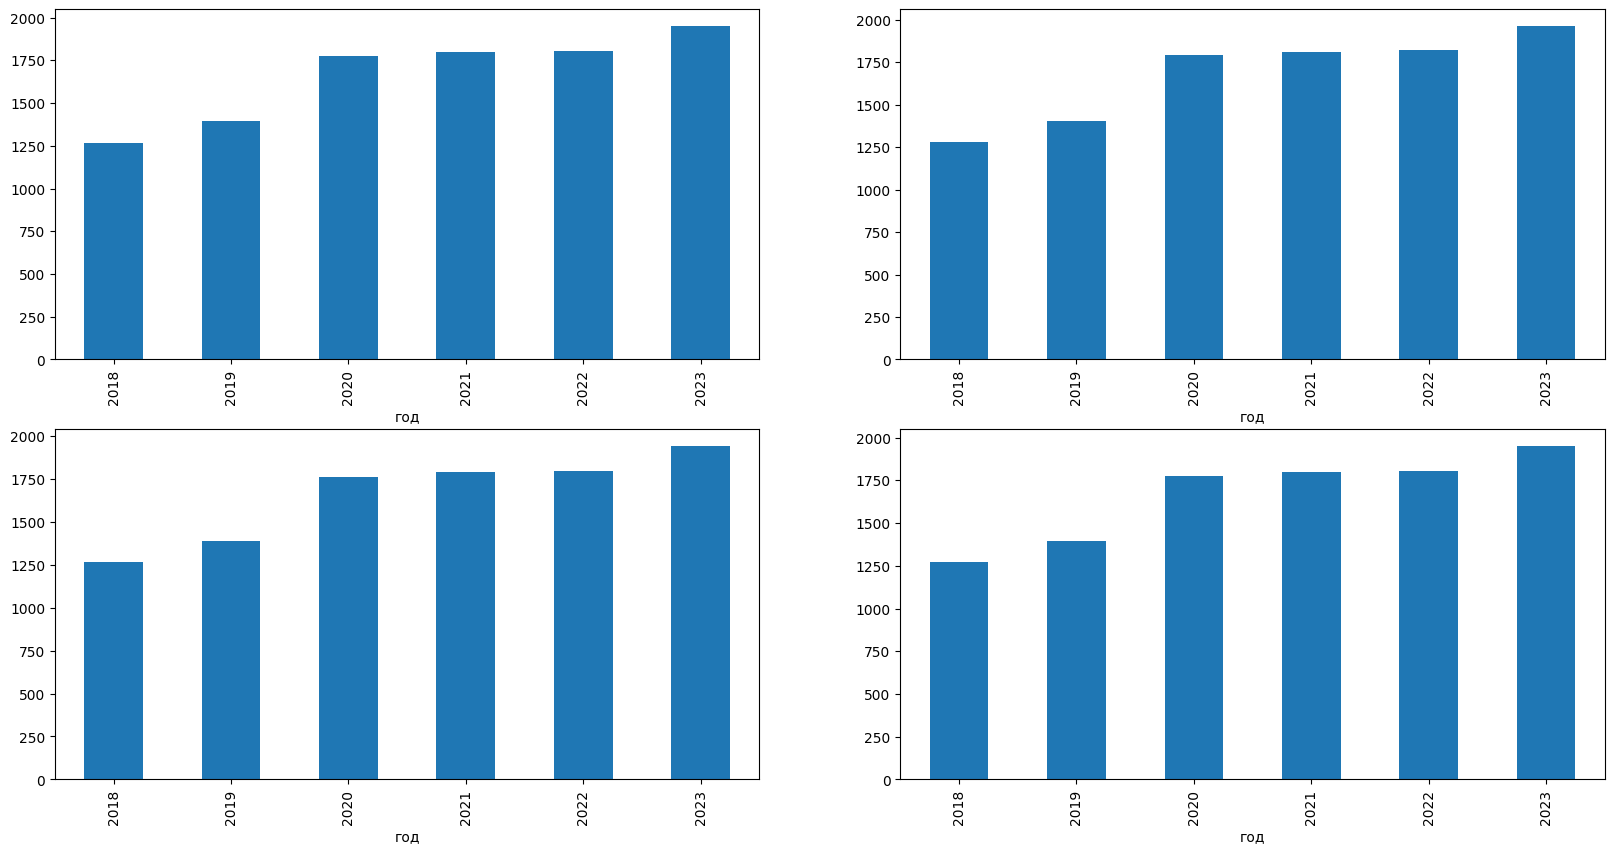

In [ ]:
data_grouped = df.groupby('год').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Откр.', 'Макс.', 'Мин.', 'Цена']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()




---



# Прогнозирование цены акций на золото

In [ ]:
df['Цена'] = data[::-1]
df1 = df.reindex(index=df.index[::-1])
df1['Дата'] = t

In [ ]:
close_data = df1.filter(['Цена'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .8))

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7a72bfb22530>>

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10
18/18 [==============================] - 5s 49ms/step - loss: 0.0573
Epoch 2/10
18/18 [==============================] - 1s 49ms/step - loss: 0.0214
Epoch 3/10
18/18 [==============================] - 1s 67ms/step - loss: 0.0157
Epoch 4/10
18/18 [==============================] - 1s 82ms/step - loss: 0.0135
Epoch 5/10
18/18 [==============================] - 1s 57ms/step - loss: 0.0137
Epoch 6/10
18/18 [==============================] - 1s 50ms/step - loss: 0.0136
Epoch 7/10
18/18 [==============================] - 1s 50ms/step - loss: 0.0117
Epoch 8/10
18/18 [==============================] - 1s 49ms/step - loss: 0.0121
Epoch 9/10
18/18 [==============================] - 1s 51ms/step - loss: 0.0120
Epoch 10/10
18/18 [==============================] - 1s 48ms/step - loss: 0.0107


In [ ]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))
print("MAPE", round(mape(y_true=y_test, y_pred=predictions)*100, 3), '%')

5/5 [==============================] - 1s 17ms/step
MSE 1162.6000504065241
RMSE 34.09692142124453
MAPE 1.361 %


In [ ]:
train = df1[:training]
test = df1[training:]
test['Predictions'] = predictions

In [ ]:
t11 = len(train['Цена'])
t22 = len(test['Predictions'])
t1 = np.arange(1, t11+1, 1)
t2 = np.arange(t11+1, t11+t22+1, 1)
print(t11, t22)

628 157


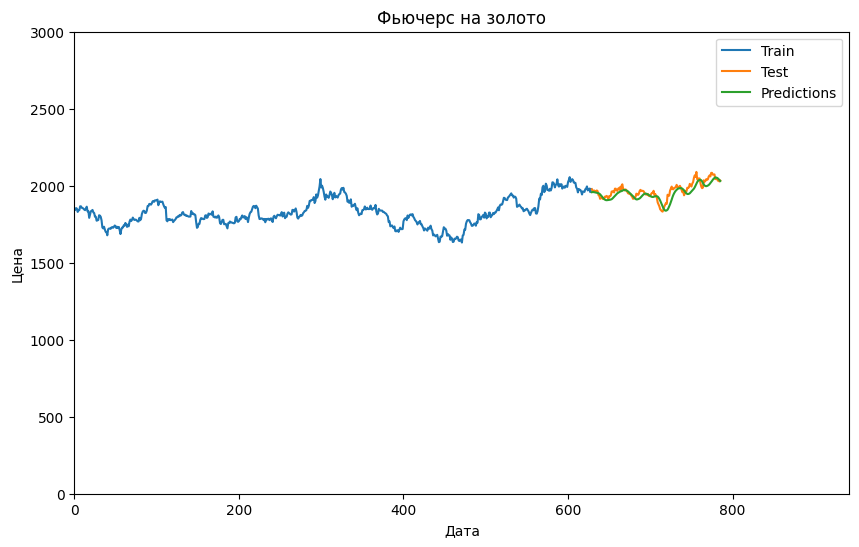

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t1, train['Цена'])
plt.plot(t2, test[['Цена', 'Predictions']])
plt.xlim(0, t11+2*t22)
plt.ylim(0, 3000)
plt.title('Фьючерс на золото')
plt.xlabel('Дата')
plt.ylabel("Цена")
plt.legend(['Train', 'Test', 'Predictions'])

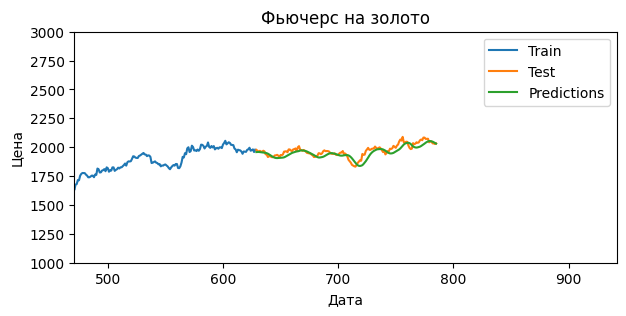

In [ ]:
plt.figure(figsize=(7, 3))
plt.plot(t1, train['Цена'])
plt.plot(t2, test[['Цена', 'Predictions']])
plt.xlim(t11-t22, t11+t22+t22)
plt.ylim(1000, 3000)
plt.title('Фьючерс на золото')
plt.xlabel('Дата')
plt.ylabel("Цена")
plt.legend(['Train', 'Test', 'Predictions'])

In [ ]:
print(sum(abs(test["Цена"]-test["Predictions"]))/len(test['Цена']))
print(max(abs(test["Цена"]-test["Predictions"])))

26.88021216908837
96.959716796875


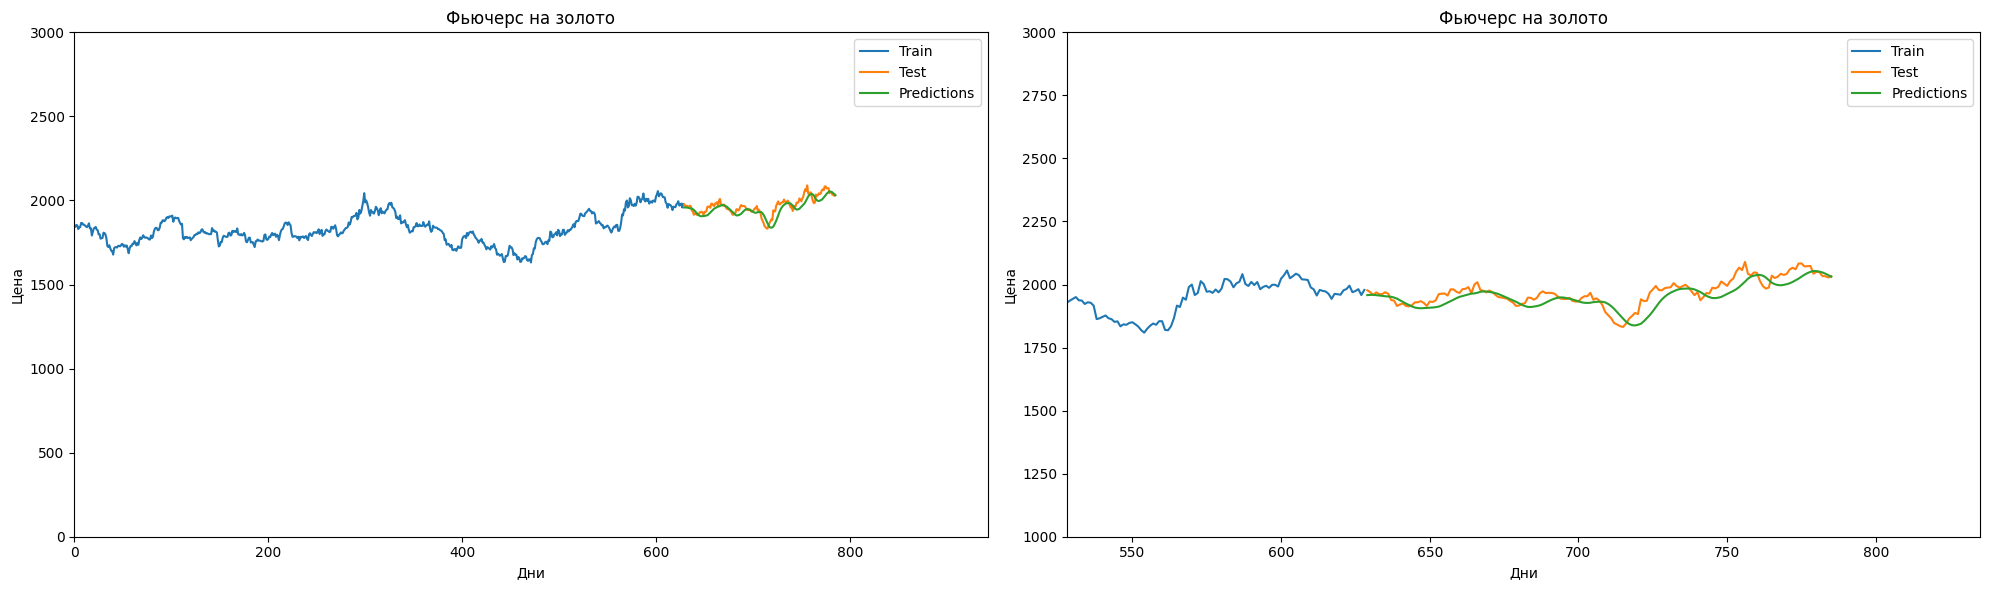

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Создание сетки из 1 строки и 2 столбцов

# Первый график
axes[0].plot(t1, train['Цена'])
axes[0].plot(t2, test[['Цена', 'Predictions']])
axes[0].set_xlim(0, t11 + 2 * t22)
axes[0].set_ylim(0, 3000)
axes[0].set_title('Фьючерс на золото')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Цена')
axes[0].legend(['Train', 'Test', 'Predictions'])

# Второй график
axes[1].plot(t1, train['Цена'])
axes[1].plot(t2, test[['Цена', 'Predictions']])
axes[1].set_xlim(t11 - 100, t11 + t22 + 50)
axes[1].set_ylim(1000, 3000)
axes[1].set_title('Фьючерс на золото')
axes[1].set_xlabel('Дни')
axes[1].set_ylabel('Цена')
axes[1].legend(['Train', 'Test', 'Predictions'])

plt.tight_layout()  # Распределение графиков равномерно
plt.show()



---



# Сбер

In [ ]:
df = pd.read_csv("/content/SBER.csv")
df['Цена'] = df['Цена'].str.replace('.', '').str.replace(',', '.').astype(float)

In [ ]:
df['Цена'] = sber[::-1]
df1 = df.reindex(index=df.index[::-1])
df1['Дата'] = ts
close_data = df1.filter(['Цена'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .8))

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7a72c0229ed0>>

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10
17/17 [==============================] - 5s 83ms/step - loss: 0.0659
Epoch 2/10
17/17 [==============================] - 1s 73ms/step - loss: 0.0203
Epoch 3/10
17/17 [==============================] - 1s 49ms/step - loss: 0.0135
Epoch 4/10
17/17 [==============================] - 1s 48ms/step - loss: 0.0123
Epoch 5/10
17/17 [==============================] - 1s 49ms/step - loss: 0.0139
Epoch 6/10
17/17 [==============================] - 1s 47ms/step - loss: 0.0132
Epoch 7/10
17/17 [==============================] - 1s 49ms/step - loss: 0.0114
Epoch 8/10
17/17 [==============================] - 1s 49ms/step - loss: 0.0116
Epoch 9/10
17/17 [==============================] - 1s 48ms/step - loss: 0.0137
Epoch 10/10
17/17 [==============================] - 1s 47ms/step - loss: 0.0103


In [ ]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))
print("MAPE", round(mape(y_true=y_test, y_pred=predictions)*100, 3), '%')

5/5 [==============================] - 1s 15ms/step
MSE 34.79929508966008
RMSE 5.899092734451636
MAPE 1.641 %


In [ ]:
train = df1[:training]
test = df1[training:]
test['Predictions'] = predictions
t11 = len(train['Цена'])
t22 = len(test['Predictions'])
t1 = np.arange(1, t11+1, 1)
t2 = np.arange(t11+1, t11+t22+1, 1)
print(t11, t22)

596 149


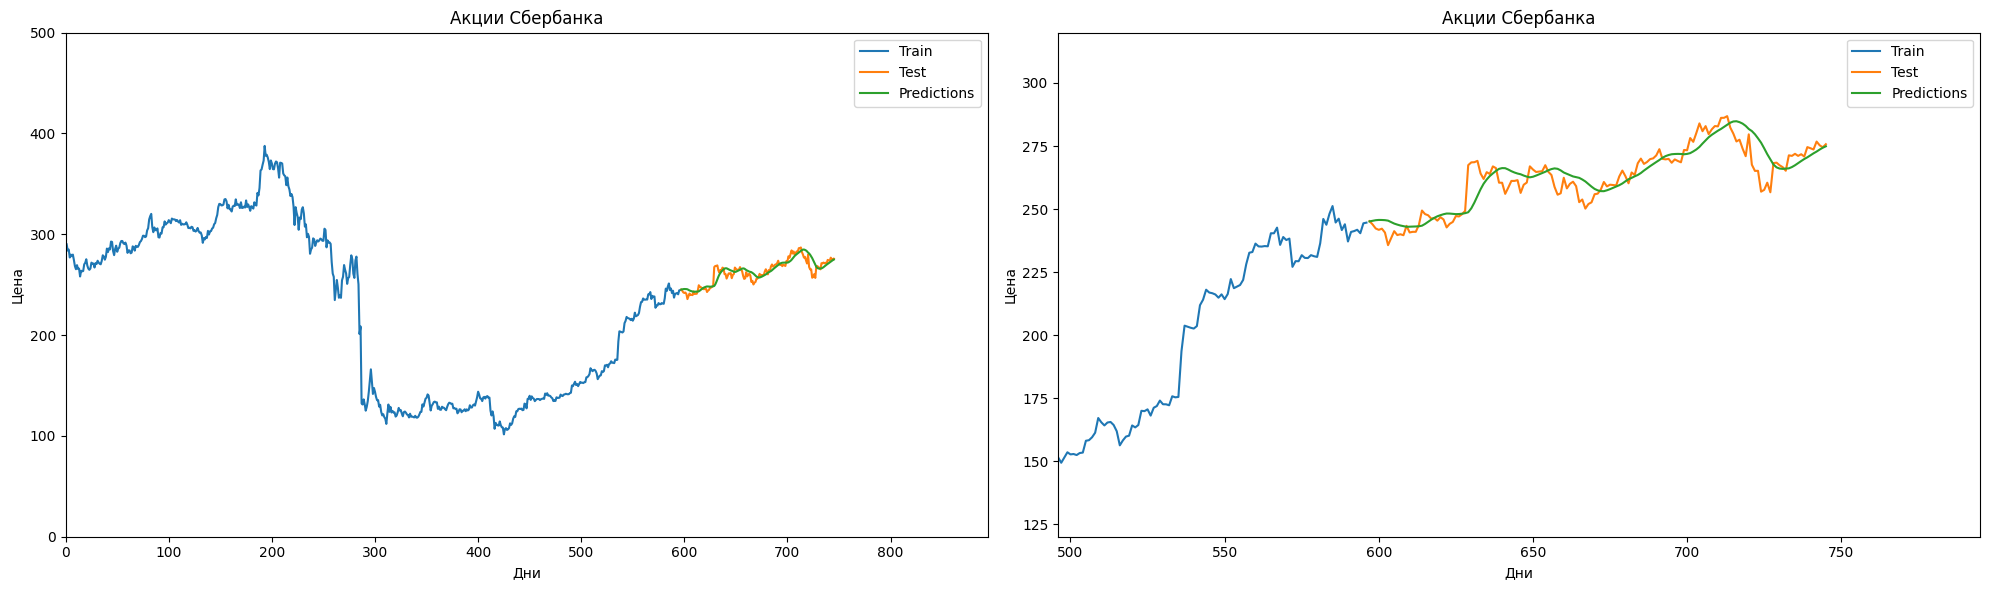

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Создание сетки из 1 строки и 2 столбцов

# Первый график
axes[0].plot(t1, train['Цена'])
axes[0].plot(t2, test[['Цена', 'Predictions']])
axes[0].set_xlim(0, t11 + 2 * t22)
axes[0].set_ylim(0, 500)
axes[0].set_title('Акции Сбербанка')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Цена')
axes[0].legend(['Train', 'Test', 'Predictions'])

# Второй график
axes[1].plot(t1, train['Цена'])
axes[1].plot(t2, test[['Цена', 'Predictions']])
axes[1].set_xlim(t11 - 100, t11 + t22 + 50)
axes[1].set_ylim(120, 320)
axes[1].set_title('Акции Сбербанка')
axes[1].set_xlabel('Дни')
axes[1].set_ylabel('Цена')
axes[1].legend(['Train', 'Test', 'Predictions'])

plt.tight_layout()
plt.show()

In [ ]:
print(sum(abs(test["Цена"]-test["Predictions"]))/len(test['Цена']))
print(max(abs(test["Цена"]-test["Predictions"])))

4.300909657318321
19.417922363281264


# Эфириум

In [ ]:
dfe = pd.read_csv("/content/ETH_USD Binance.csv")
dfe['Цена'] = dfe['Цена'].str.replace('.', '').str.replace(',', '.').astype(float)

In [ ]:
dfe['Цена'] = eth[::-1]
df1 = dfe.reindex(index=dfe.index[::-1])
df1['Дата'] = te
close_data = df1.filter(['Цена'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .8))

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7f179ff05a80>>

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10
26/26 [==============================] - 6s 91ms/step - loss: 0.0432
Epoch 2/10
26/26 [==============================] - 2s 70ms/step - loss: 0.0121
Epoch 3/10
26/26 [==============================] - 1s 52ms/step - loss: 0.0111
Epoch 4/10
26/26 [==============================] - 1s 51ms/step - loss: 0.0105
Epoch 5/10
26/26 [==============================] - 1s 51ms/step - loss: 0.0101
Epoch 6/10
26/26 [==============================] - 1s 55ms/step - loss: 0.0105
Epoch 7/10
26/26 [==============================] - 1s 55ms/step - loss: 0.0082
Epoch 8/10
26/26 [==============================] - 1s 52ms/step - loss: 0.0088
Epoch 9/10
26/26 [==============================] - 2s 60ms/step - loss: 0.0091
Epoch 10/10
26/26 [==============================] - 2s 85ms/step - loss: 0.0085


In [ ]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))
print("MAPE", round(mape(y_true=y_test, y_pred=predictions)*100, 3), '%')

7/7 [==============================] - 1s 18ms/step
MSE 6283.686153863699
RMSE 79.26970514555796
MAPE 3.671 %


In [ ]:
train = df1[:training]
test = df1[training:]
test['Predictions'] = predictions
t11 = len(train['Цена'])
t22 = len(test['Predictions'])
t1 = np.arange(1, t11+1, 1)
t2 = np.arange(t11+1, t11+t22+1, 1)
print(t11, t22)

870 217


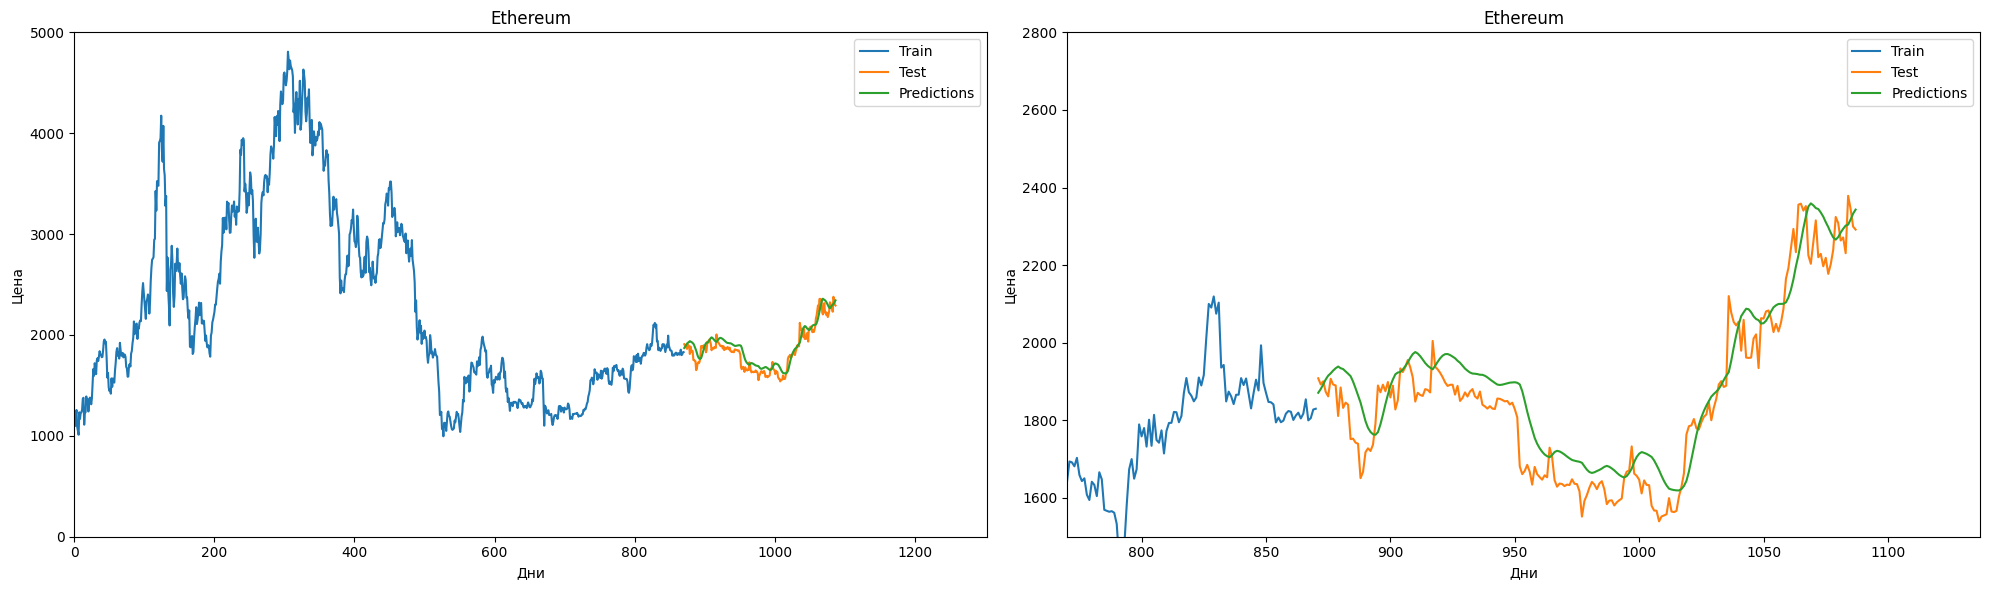

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Создание сетки из 1 строки и 2 столбцов

# Первый график
axes[0].plot(t1, train['Цена'])
axes[0].plot(t2, test[['Цена', 'Predictions']])
axes[0].set_xlim(0, t11 + 2 * t22)
axes[0].set_ylim(0, 5000)
axes[0].set_title('Ethereum')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Цена')
axes[0].legend(['Train', 'Test', 'Predictions'])

# Второй график
axes[1].plot(t1, train['Цена'])
axes[1].plot(t2, test[['Цена', 'Predictions']])
axes[1].set_xlim(t11 - 100, t11 + t22 + 50)
axes[1].set_ylim(1500, 2800)
axes[1].set_title('Ethereum')
axes[1].set_xlabel('Дни')
axes[1].set_ylabel('Цена')
axes[1].legend(['Train', 'Test', 'Predictions'])

plt.tight_layout()
plt.show()

In [ ]:
print(sum(abs(test["Цена"]-test["Predictions"]))/len(test['Цена']))
print(max(abs(test["Цена"]-test["Predictions"])))

66.73526922973068
214.04954101562498


# Cardano

In [ ]:
dfa = pd.read_csv("/content/Cardano.csv")
dfa['Цена'] = dfa['Цена'].str.replace('.', '').str.replace(',', '.').astype(float)

In [ ]:
dfa['Цена'] = ada[::-1]
df1 = dfa.reindex(index=dfa.index[::-1])
df1['Дата'] = ta
close_data = df1.filter(['Цена'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .8))

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7f16e7cca5c0>>

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10
26/26 [==============================] - 5s 53ms/step - loss: 0.0230
Epoch 2/10
26/26 [==============================] - 2s 78ms/step - loss: 0.0093
Epoch 3/10
26/26 [==============================] - 2s 79ms/step - loss: 0.0089
Epoch 4/10
26/26 [==============================] - 1s 53ms/step - loss: 0.0077
Epoch 5/10
26/26 [==============================] - 1s 52ms/step - loss: 0.0069
Epoch 6/10
26/26 [==============================] - 1s 52ms/step - loss: 0.0070
Epoch 7/10
26/26 [==============================] - 1s 51ms/step - loss: 0.0059
Epoch 8/10
26/26 [==============================] - 1s 51ms/step - loss: 0.0053
Epoch 9/10
26/26 [==============================] - 1s 54ms/step - loss: 0.0064
Epoch 10/10
26/26 [==============================] - 2s 82ms/step - loss: 0.0061


In [ ]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))
print("MAPE", round(mape(y_true=y_test, y_pred=predictions)*100, 3), '%')

7/7 [==============================] - 1s 26ms/step
MSE 0.0009945006613138394
RMSE 0.03153570454760508
MAPE 5.067 %


In [ ]:
train = df1[:training]
test = df1[training:]
test['Predictions'] = predictions
t11 = len(train['Цена'])
t22 = len(test['Predictions'])
t1 = np.arange(1, t11+1, 1)
t2 = np.arange(t11+1, t11+t22+1, 1)
print(t11, t22)

872 218


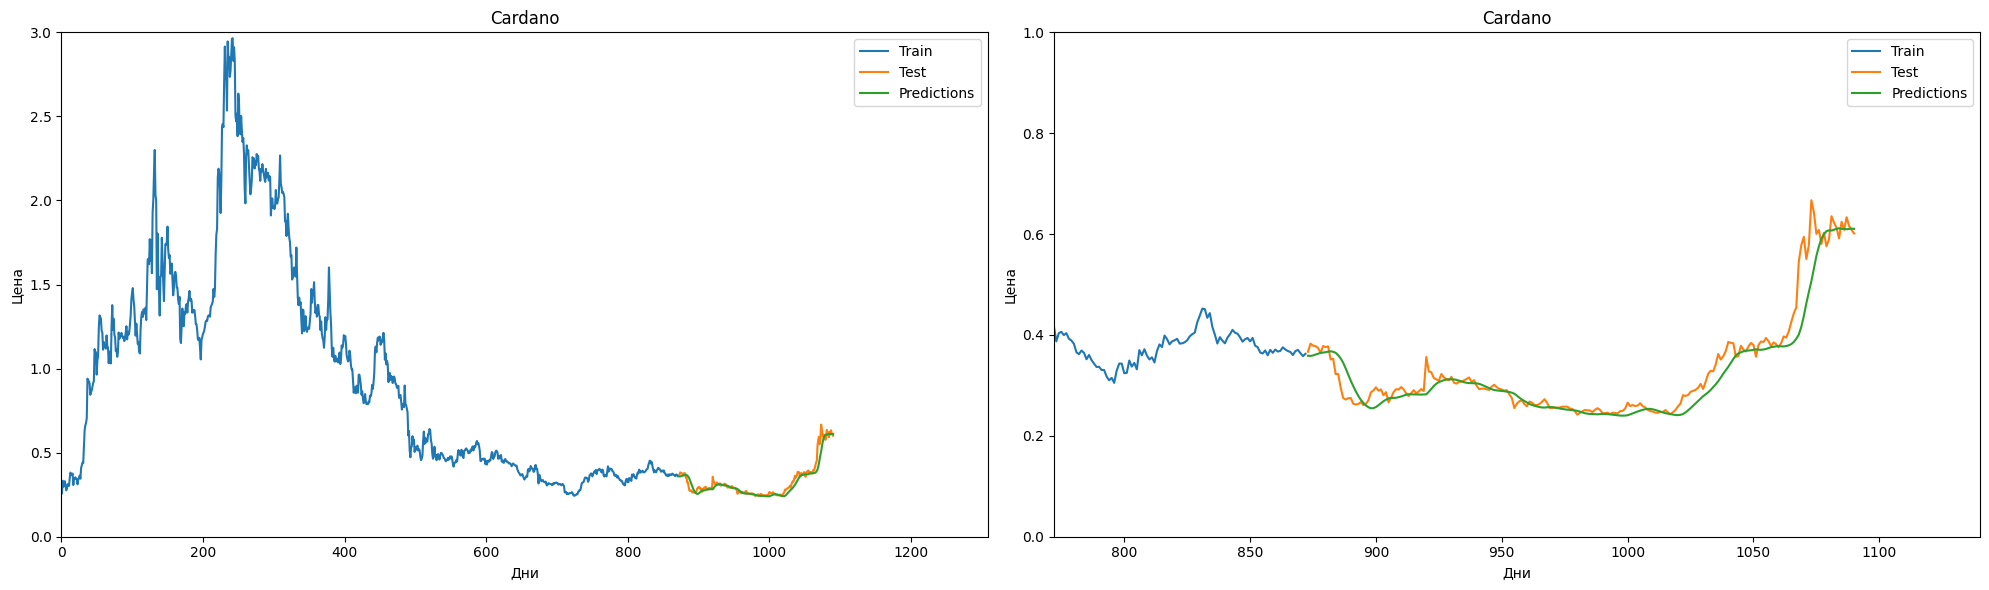

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Создание сетки из 1 строки и 2 столбцов

# Первый график
axes[0].plot(t1, train['Цена'])
axes[0].plot(t2, test[['Цена', 'Predictions']])
axes[0].set_xlim(0, t11 + 2 * t22)
axes[0].set_ylim(0, 3)
axes[0].set_title('Cardano')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Цена')
axes[0].legend(['Train', 'Test', 'Predictions'])

# Второй график
axes[1].plot(t1, train['Цена'])
axes[1].plot(t2, test[['Цена', 'Predictions']])
axes[1].set_xlim(t11 - 100, t11 + t22 + 50)
axes[1].set_ylim(0, 1)
axes[1].set_title('Cardano')
axes[1].set_xlabel('Дни')
axes[1].set_ylabel('Цена')
axes[1].legend(['Train', 'Test', 'Predictions'])

plt.tight_layout()
plt.show()

In [ ]:
print(sum(abs(test["Цена"]-test["Predictions"]))/len(test['Цена']))
print(max(abs(test["Цена"]-test["Predictions"])))

0.01830045588399292
0.16182921090126035




---

---



---



